In [ ]:
import pandas as pd
import zipfile
import random
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zf = zipfile.ZipFile('/content/drive/MyDrive/Data/Diabetes_Classificacao/diabetes-classification.zip')  #aloca o arquivo zip

data_train = pd.read_csv(zf.open('train.csv')) # abre o arquivo CSV 'train.csv' presente dentro do ZIP

data_test = pd.read_csv('/content/drive/MyDrive/Data/Diabetes_Classificacao/new_test.csv')   # abre o arquivo CSV 'new_test.csv' que foi criado após adição da coluna 'diabetes_svm'

In [ ]:
data_train = data_train.drop('p_id', axis=1) # remove a coluna de IDs

In [ ]:
#separando o conjunto de teste em 10 partes
size = np.linspace(0.1, 1.0, num=10, endpoint=True)

init = 0
parts = []
for i in size:
  size_part = int(round(len(data_train)*(i - init)))
  parts.append(data_train.sample(n=size_part))
  init = i;


In [ ]:
#criando uma lista de treino com as partes divididas anteriormente

X_train = []
Y_train = []
for i in range(0,10):
  X_train.append(parts[i].values[:,0:8])
  Y_train.append(parts[i].values[:,8])

In [ ]:
#criando os testes (serão usados posteriormente para calcular acurácia)
X_test = data_test.values[:,0:8]
Y_test = data_test.values[:,8]

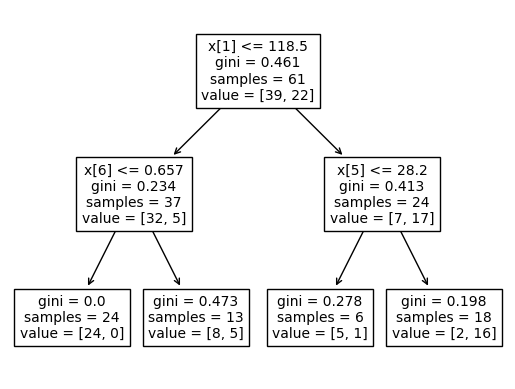

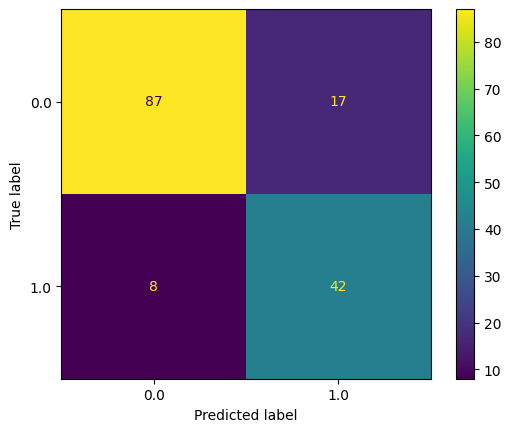


Acurácia da partição 0 é: 0.8376623376623377
Acurácia balanceada da partição 0 é: 0.8382692307692308




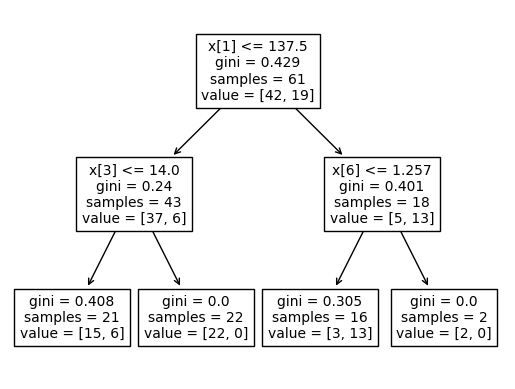

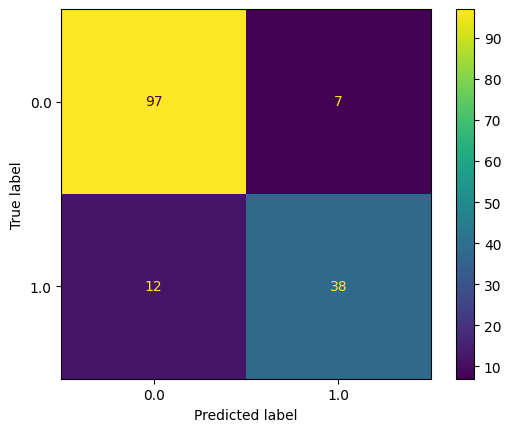


Acurácia da partição 1 é: 0.8766233766233766
Acurácia balanceada da partição 1 é: 0.8463461538461539




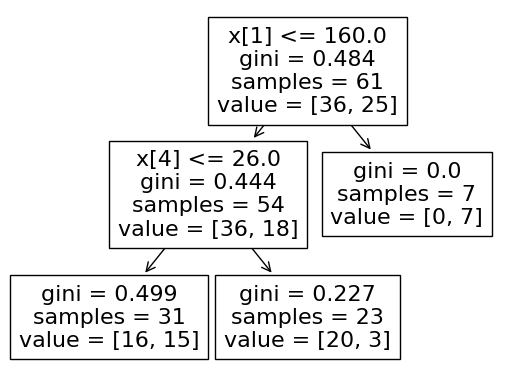

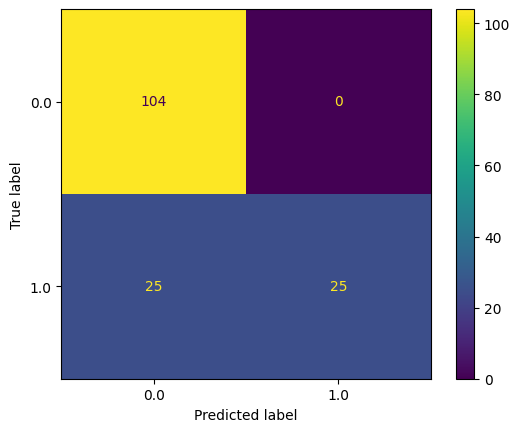


Acurácia da partição 2 é: 0.8376623376623377
Acurácia balanceada da partição 2 é: 0.75




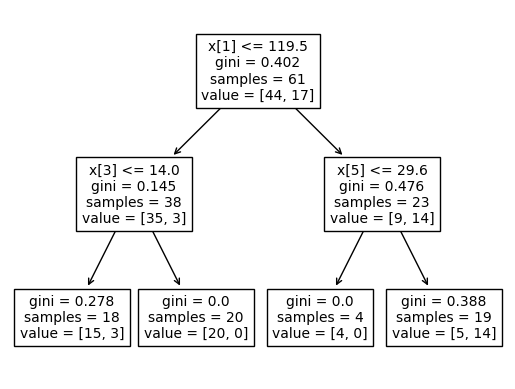

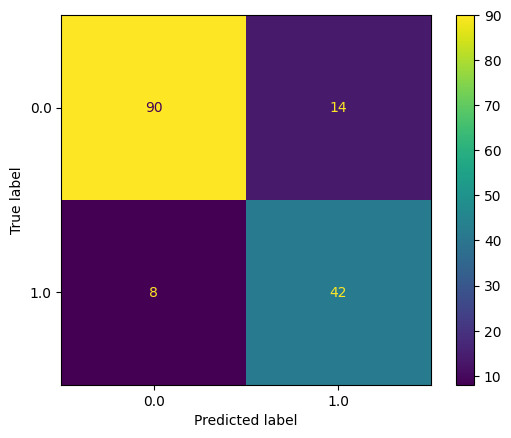


Acurácia da partição 3 é: 0.8571428571428571
Acurácia balanceada da partição 3 é: 0.8526923076923076




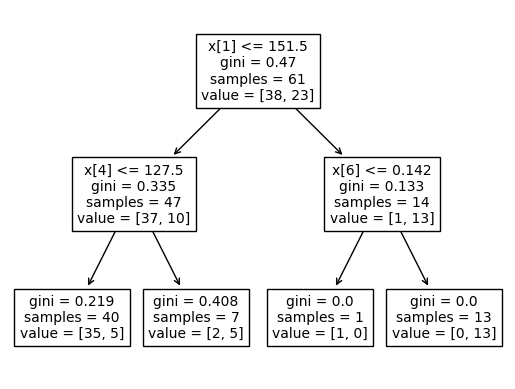

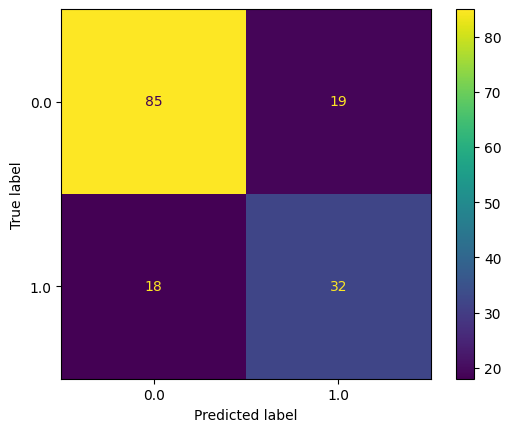


Acurácia da partição 4 é: 0.7597402597402597
Acurácia balanceada da partição 4 é: 0.7286538461538461




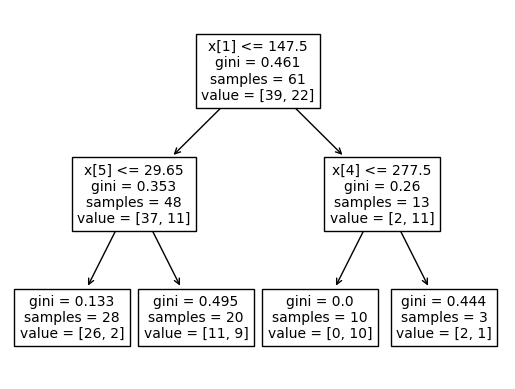

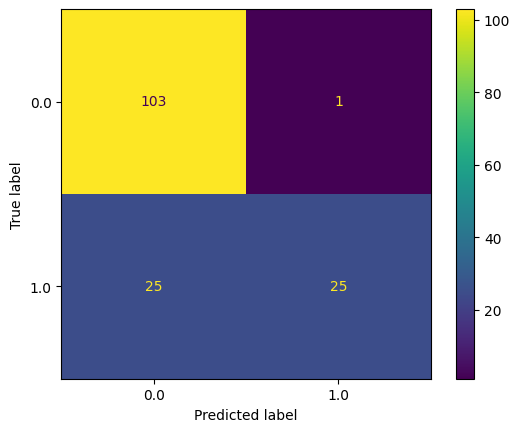


Acurácia da partição 5 é: 0.8311688311688312
Acurácia balanceada da partição 5 é: 0.7451923076923077




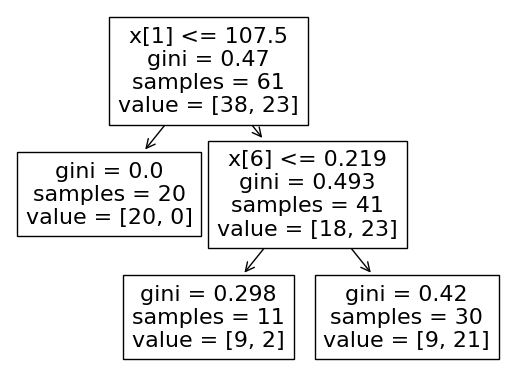

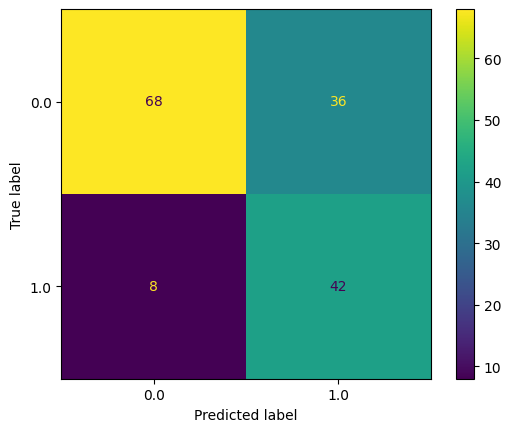


Acurácia da partição 6 é: 0.7142857142857143
Acurácia balanceada da partição 6 é: 0.7469230769230769




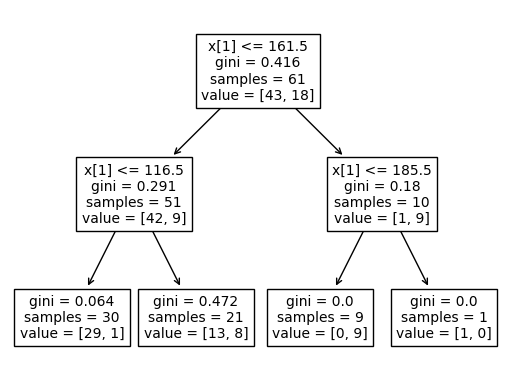

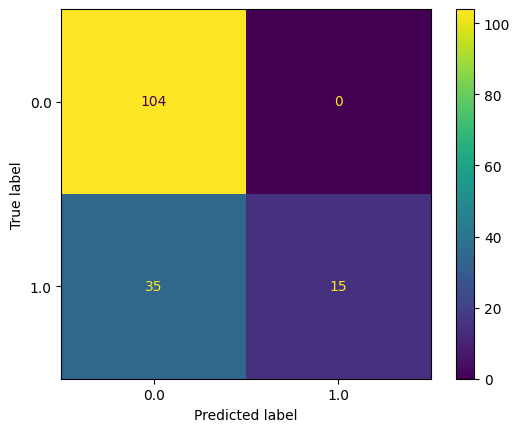


Acurácia da partição 7 é: 0.7727272727272727
Acurácia balanceada da partição 7 é: 0.65




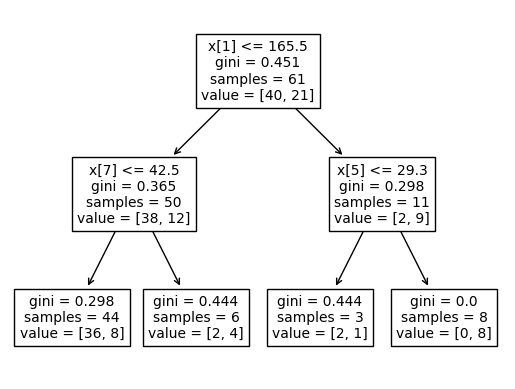

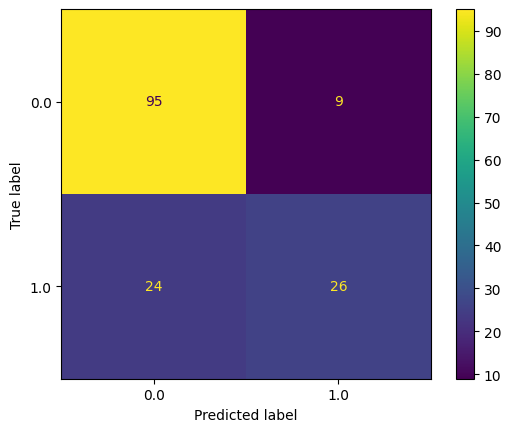


Acurácia da partição 8 é: 0.7857142857142857
Acurácia balanceada da partição 8 é: 0.7167307692307692




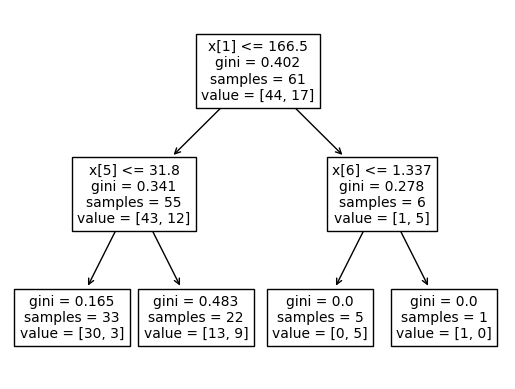

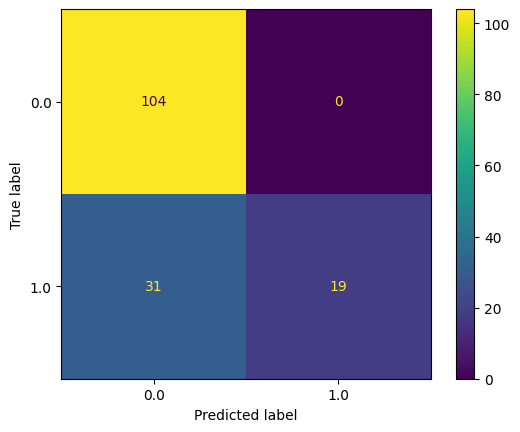


Acurácia da partição 9 é: 0.7987012987012987
Acurácia balanceada da partição 9 é: 0.69




In [ ]:
#10 árvores criadas de acordo com as partições, tal como as suas respectivas matrizes de confusão e o cálculo das acurácias
accuracy = []
balanced_accuracy = []
for i in range(0,10):
  clf = DecisionTreeClassifier(random_state=0, max_depth=2)
  clf.fit(X_train[i], Y_train[i])
  predicao = clf.predict(X_test)

  tree.plot_tree(clf)
  _ = ConfusionMatrixDisplay.from_estimator(clf, X_test, Y_test)
  plt.show()
  print()
  accuracy.append(accuracy_score(Y_test, predicao))
  balanced_accuracy.append(balanced_accuracy_score(Y_test, predicao))
  print("Acurácia da partição", i ,"é:", accuracy[i])
  print("Acurácia balanceada da partição", i , "é:", balanced_accuracy[i])
  print()
  print()

<function matplotlib.pyplot.show(close=None, block=None)>

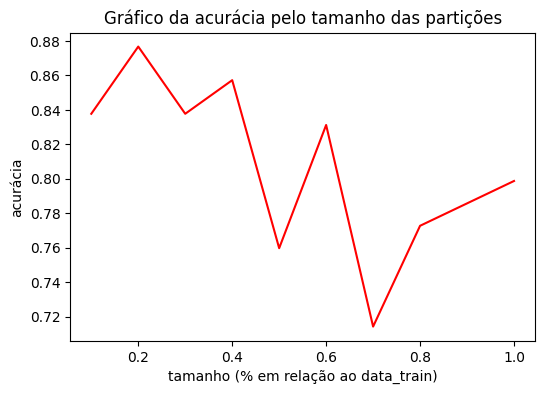

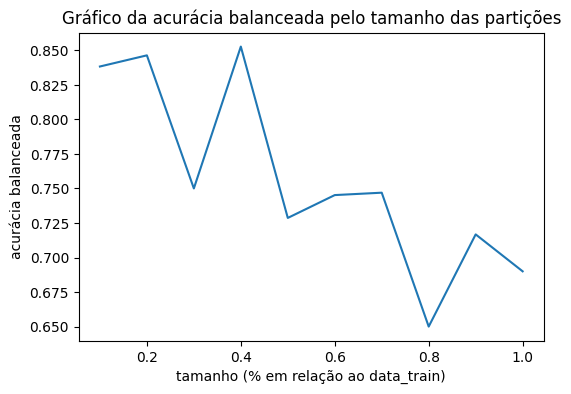

In [ ]:
#gráfico das acurácias pelo tamanho das partições

plt.figure(figsize=(6, 4))
plt.title("Gráfico da acurácia pelo tamanho das partições")
plt.plot(size, accuracy, label="acurácia", color='red')
plt.xlabel("tamanho (% em relação ao data_train)")
plt.ylabel("acurácia")


plt.figure(figsize=(6, 4))
plt.title("Gráfico da acurácia balanceada pelo tamanho das partições")
plt.plot(size, balanced_accuracy, label="acurácia balanceada")
plt.xlabel("tamanho (% em relação ao data_train)")
plt.ylabel("acurácia balanceada")


plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

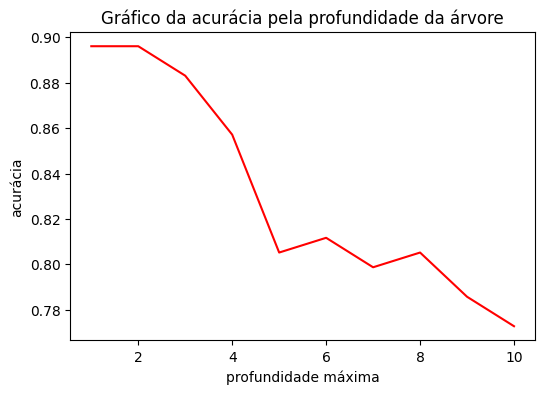

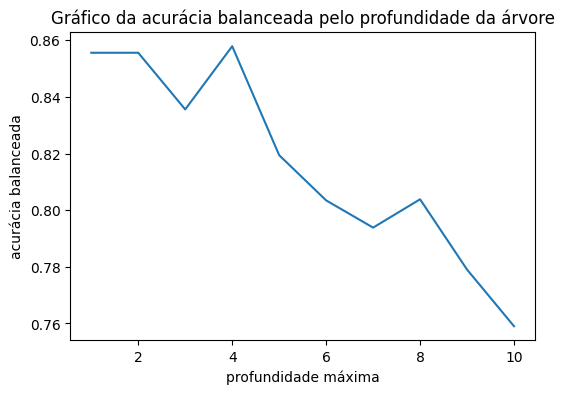

In [ ]:
#gráfico das acurácias pela profundidade da árvore
total_accuracy = []
total_balanced_accuracy = []
depth = [1,2,3,4,5,6,7,8,9,10]

X_total_train = data_train.values[:,0:8]
Y_total_train = data_train.values[:,8]

for i in range(0,10):
  clf = DecisionTreeClassifier(random_state=0, max_depth=depth[i])
  clf.fit(X_total_train, Y_total_train)
  predicao = clf.predict(X_test)
  total_accuracy.append(accuracy_score(Y_test, predicao))
  total_balanced_accuracy.append(balanced_accuracy_score(Y_test, predicao))

  
plt.figure(figsize=(6, 4))
plt.title("Gráfico da acurácia pela profundidade da árvore")
plt.plot(depth, total_accuracy, label="acurácia", color='red')
plt.xlabel("profundidade máxima")
plt.ylabel("acurácia")


plt.figure(figsize=(6, 4))
plt.title("Gráfico da acurácia balanceada pelo profundidade da árvore")
plt.plot(depth, total_balanced_accuracy, label="acurácia balanceada")
plt.xlabel("profundidade máxima")
plt.ylabel("acurácia balanceada")


plt.show